# Hardware efficiency

In [38]:
import csv
import re

miners = []
with open('miners.csv') as datafile:
    reader = csv.DictReader(datafile)
    for rowdict in reader:
        rowdict['Power (kW)'] = float(re.search('([0-9])+',rowdict['Power']).group(0))/1000.0
        rowdict['Hashrate (Th/s)'] = float(re.search('([0-9])+',rowdict['Hashrate']).group(0))
        rowdict['alpha (kWh/hash)']=rowdict['Power (kW)']/(rowdict['Hashrate (Th/s)']*3600)
        miners.append(rowdict)

Text(0, 0.5, 'kWh/hash')

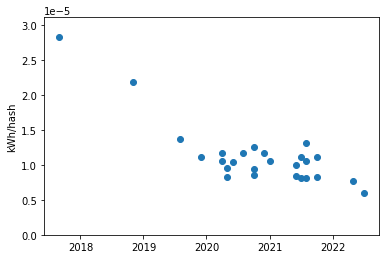

In [40]:
import matplotlib.pyplot as plt
import datetime as dt


plt.scatter(x=[dt.datetime.strptime(m['Date'], '%b %Y').date() for m in miners], 
         y=[m['alpha (kWh/hash)'] for m in miners])
plt.ylim([0,max(m['alpha (kWh/hash)'] for m in miners)*1.1])
plt.ylabel('kWh/hash')

# Mining share of value

In [42]:
import pandas as pd

In [87]:
rev = pd.read_csv('miners-revenue.csv')
mkt = pd.read_csv('market-cap.csv')
rev.rename({'bbbbb﻿Timestamp': 'Timestamp'}, axis=1, inplace=True)
rev['Timestamp'] = pd.to_datetime(rev['Timestamp'])
mkt['Timestamp'] = pd.to_datetime(mkt['Timestamp'])
rev.set_index('Timestamp', inplace=True)
mkt.set_index('Timestamp', inplace=True)
both = mkt.merge(rev, how='outer', on='Timestamp', sort=True)
both.interpolate(method='time', inplace=True)

In [91]:
vt = both.apply(lambda row: row['miners-revenue']*365.25/row['market-cap'], axis=1)

/tmp/ipykernel_121816/1280081866.py:1: RuntimeWarning: invalid value encountered in double_scalars
  vt = both.apply(lambda row: row['miners-revenue']*365.25/row['market-cap'], axis=1)
/tmp/ipykernel_121816/1280081866.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  vt = both.apply(lambda row: row['miners-revenue']*365.25/row['market-cap'], axis=1)


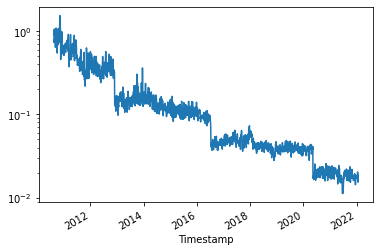

In [94]:
vt.plot()
plt.yscale('log')